Build a machine learning model to predict the likelihood of a patient having heart disease based on various medical attributes.

Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
! unzip -o /content/heart+disease.zip


Archive:  /content/heart+disease.zip
  inflating: Index                   
  inflating: WARNING                 
  inflating: ask-detrano             
  inflating: bak                     
  inflating: cleve.mod               
  inflating: cleveland.data          
   creating: costs/
  inflating: costs/Index             
  inflating: costs/heart-disease.README  
  inflating: costs/heart-disease.cost  
  inflating: costs/heart-disease.delay  
  inflating: costs/heart-disease.expense  
  inflating: costs/heart-disease.group  
  inflating: heart-disease.names     
  inflating: hungarian.data          
  inflating: long-beach-va.data      
  inflating: new.data                
  inflating: processed.cleveland.data  
  inflating: processed.hungarian.data  
  inflating: processed.switzerland.data  
  inflating: processed.va.data       
  inflating: reprocessed.hungarian.data  
  inflating: switzerland.data        


In [ ]:
file_path = '/content/processed.hungarian.data'
# Create a list of column names based on variable descriptions
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
           'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(file_path, names=columns, na_values="?")
print(data.head())
data.head(7)

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   slope  ca  thal  num  
0    NaN NaN   NaN    0  
1    NaN NaN   NaN    0  
2    NaN NaN   NaN    0  
3    NaN NaN   6.0    0  
4    NaN NaN   NaN    0  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,NaN,NaN,NaN,0
6,32,1,2,110.0,225.0,0.0,0.0,184.0,0.0,0.0,NaN,NaN,NaN,0


Accuracy: 0.8983050847457628

Confusion Matrix:
[[35  3]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.86      0.86      0.86        21

    accuracy                           0.90        59
   macro avg       0.89      0.89      0.89        59
weighted avg       0.90      0.90      0.90        59



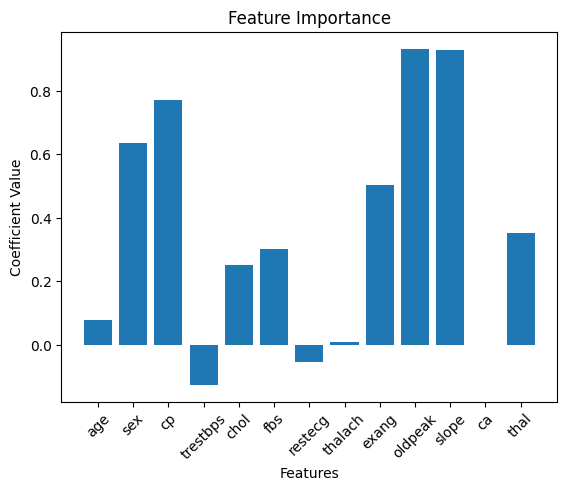

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

file_path = '/content/processed.hungarian.data'

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
           'oldpeak', 'slope', 'ca', 'thal', 'num']

data = pd.read_csv(file_path, names=columns, na_values="?")

features = data.drop('num', axis=1)
target = data['num']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# cleaning Nan values
imputer = SimpleImputer(strategy='mean')  # или 'median', 'most_frequent', в зависимости от вашего выбора
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

plt.bar(features.columns, model.coef_[0])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


Oldpeak exist in predicting heart disease


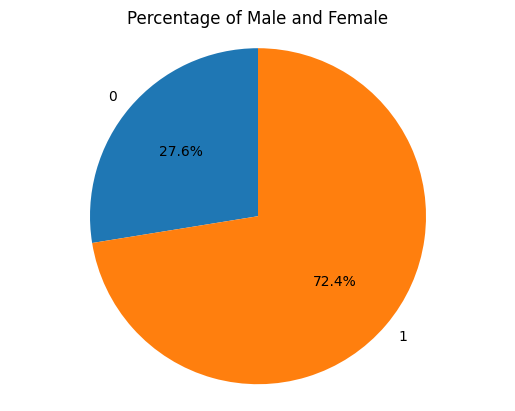

In [ ]:
file_path = '/content/processed.hungarian.data'

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
           'oldpeak', 'slope', 'ca', 'thal', 'num']
# Grouping by gender and calculating the size
gender_grouped = data.groupby('sex').size()

# Converting to percentage
gender_percentage = gender_grouped / gender_grouped.sum() * 100

# Visualization
gender_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Male and Female')
plt.axis('equal')
plt.show()


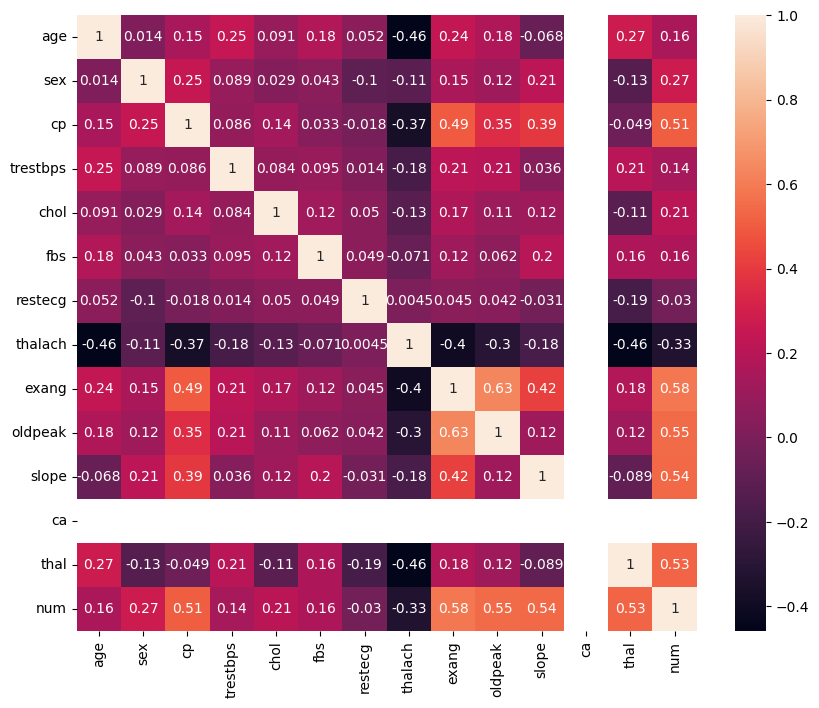

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()